In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data from source 
df = pd.read_csv(r"C:\AI Pwskill\Sentiment Analysis\data\sentiment500k.csv")

In [3]:
df.head(5)

,Text,Language,Label
0,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative
1,Rwanda is set to host the headquarters of Unit...,en,positive
2,It sucks for me since I'm focused on the natur...,en,negative
3,@en_font Treballar a l’obra a partir dels 19 a...,ca,negative
4,Social Security. Constant political crises dis...,en,negative


In [4]:
# Checking for datatypes
df.dtypes

Text        object
Language    object
Label       object
dtype: object

In [5]:
# Checking for duplicate instances
df.duplicated().sum()

np.int64(2537)

Insight: During the exploratory data analysis phase, I identified 2,537 duplicate records in the dataset. These duplicates likely resulted from repeated entries or data collection inconsistencies. Since duplicate data can bias statistical results and negatively impact model performance, I plan to address them during the data cleaning stage to ensure the dataset’s accuracy and reliability.

In [6]:
# Checking for null values
df.isnull().sum()

Text         0
Language    18
Label        0
dtype: int64

Insight: I observed 18 null values in the ‘Language’ attribute. Missing data in this column may affect the completeness of linguistic or regional analysis.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526765 entries, 0 to 526764
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Text      526765 non-null  object
 1   Language  526747 non-null  object
 2   Label     526765 non-null  object
dtypes: object(3)
memory usage: 12.1+ MB


In [8]:
# Summary of the dataset
df.describe()

,Text,Language,Label
count,526765,526747,526765
unique,522406,71,2
top,@FlylightsTech Good project,en,positive
freq,73,492662,264545


# Univariate analysis

---

In [9]:
df.head(5)

,Text,Language,Label
0,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative
1,Rwanda is set to host the headquarters of Unit...,en,positive
2,It sucks for me since I'm focused on the natur...,en,negative
3,@en_font Treballar a l’obra a partir dels 19 a...,ca,negative
4,Social Security. Constant political crises dis...,en,negative


In [10]:
df['Label'].value_counts()

Label
positive    264545
negative    262220
Name: count, dtype: int64

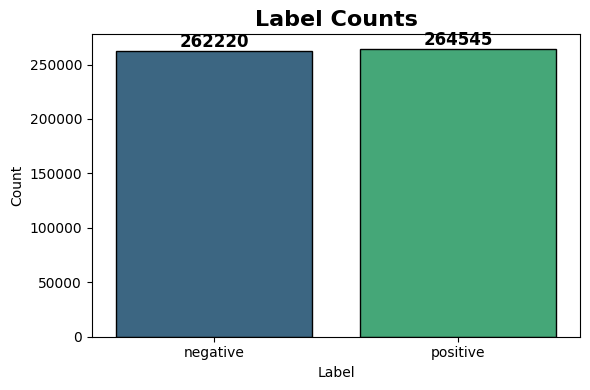

In [11]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Label', data=df, palette='viridis', edgecolor='black')

# Add counts on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', 
                (p.get_x() + p.get_width()/2, count), 
                ha='center', va='bottom', 
                fontsize=12, fontweight='bold', color='black')

plt.title('Label Counts', fontsize=16, fontweight='bold')
plt.xlabel('Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


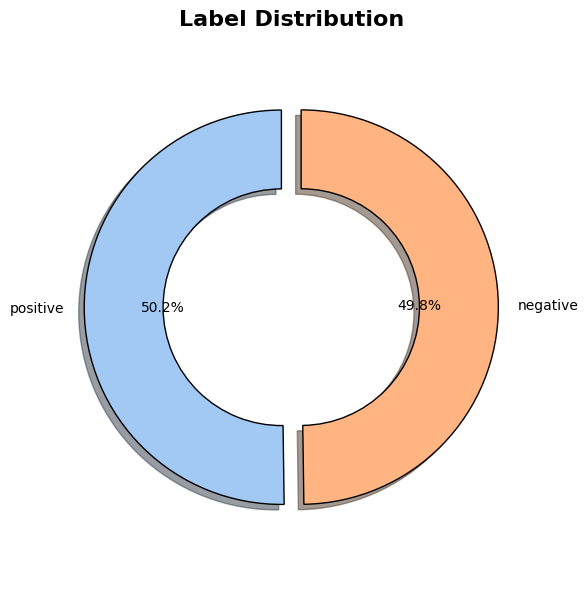

In [12]:
counts = df['Label'].value_counts()
labels = counts.index

colors = sns.color_palette('pastel', len(counts))
explode = [0.05] * len(counts)

plt.figure(figsize=(6,6))
plt.pie(
    counts.values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    colors=colors,
    shadow=True,
    wedgeprops={'width': 0.4, 'edgecolor': 'black'}
)

plt.title('Label Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

Insight: The target variable shows a fairly balanced distribution, with 264,545 positive instances and 262,220 negative instances. This near-equal class representation suggests that the dataset is well-suited for classification modeling, as there is no significant class imbalance that might bias the model’s predictions.

In [13]:
df['Language'].value_counts().head(10)

Language
en     492662
fr       7840
ja       6559
es       2557
in       2076
pt       1820
und      1810
tl       1751
de       1746
hi        827
Name: count, dtype: int64

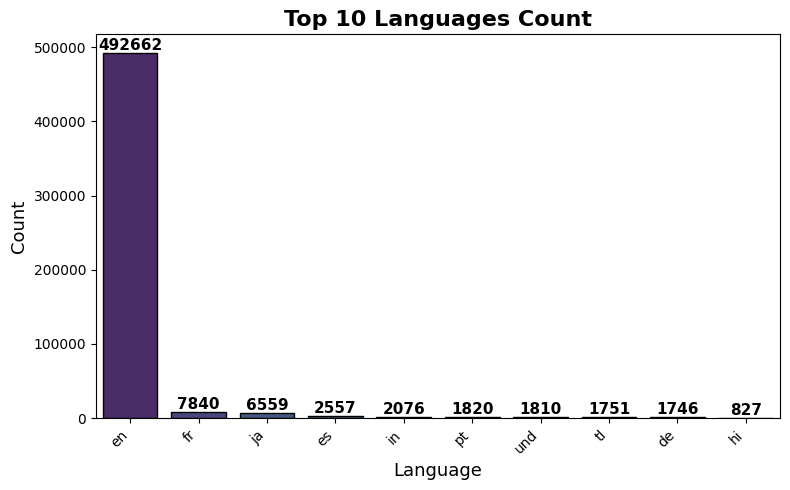

In [14]:
# Top 10 most frequent languages
top10_langs = df['Language'].value_counts().head(10).index

# Filter dataframe to only include those top 10
df_top10 = df[df['Language'].isin(top10_langs)]

# Create the count plot
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Language', data=df_top10, palette='viridis', edgecolor='black',
                   order=top10_langs)  # ensures bars appear in top10 order

# Add counts on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width()/2, count),
                ha='center', va='bottom',
                fontsize=11, fontweight='bold', color='black')

# Titles and labels
plt.title('Top 10 Languages Count', fontsize=16, fontweight='bold')
plt.xlabel('Language', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [15]:
top10_langs

Index(['en', 'fr', 'ja', 'es', 'in', 'pt', 'und', 'tl', 'de', 'hi'], dtype='object', name='Language')

Insight: During the exploratory data analysis, I examined the ‘Language’ column and found a total of 71 unique language codes, indicating considerable linguistic diversity in the dataset. However, the distribution is highly skewed toward English (‘en’), which accounts for 492,662 records — by far the most dominant language.

The next most frequent languages include French (‘fr’) with 7,840 records, Japanese (‘ja’) with 6,559, Spanish (‘es’) with 2,557, and Indonesian (‘in’) with 2,076. Other languages such as Portuguese (‘pt’), Undetermined (‘und’), Tagalog (‘tl’), German (‘de’), and Hindi (‘hi’) also appear among the top 10, each with counts ranging between 800 and 2,000 records.

This distribution shows that while the dataset includes content in multiple languages, it is predominantly English-based, with non-English samples forming only a small fraction of the total.

In [16]:
df['Language'].value_counts(ascending=True).head(20)

Language
[Photo(previewUrl='https://pbs.twimg.com/media/FWWBzWTXkAAyZqm?format=jpg&name=small', fullUrl='https://pbs.twimg.com/media/FWWBzWTXkAAyZqm?format=jpg&name=large')]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 1
[Photo(previewUrl='https://pbs.twimg.com/media/FWV94O7UEAAjMOi?format=jpg&name=small', fullUrl='https://pbs.twimg.com/media/FWV94O7UEAAjMOi?format=jpg&name=large')]    

Upon further analysis of the ‘Language’ column, I discovered that it contains several irrelevant or malformed entries, such as image URLs and non-language text (e.g., links like Photo(previewUrl=...)). These values clearly do not represent valid language codes and were likely introduced due to data extraction or parsing errors.

Since these entries do not contribute any meaningful linguistic information, they are considered irrelevant outliers within the column. To maintain the integrity and accuracy of the dataset, I plan to handle these invalid records by either removing them or imputing them appropriately (for example, assigning them as “unknown” or “undefined”) before proceeding with further analysis.

Cleaning this column will ensure that only valid and interpretable language codes remain, which is essential for reliable multilingual or demographic analyses later in the project.

In [17]:
df.head(10)

,Text,Language,Label
0,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative
1,Rwanda is set to host the headquarters of Unit...,en,positive
2,It sucks for me since I'm focused on the natur...,en,negative
3,@en_font Treballar a l’obra a partir dels 19 a...,ca,negative
4,Social Security. Constant political crises dis...,en,negative
5,@FilmThePoliceLA A broken rib can puncture a l...,en,negative
6,@jacobringenwald @aKeithWatts @CountDankulaTV ...,en,negative
7,@NZ_HK_SU @telebusiness My question was rhetor...,en,negative
8,Wimbledon: Nick Kyrgios admits spitting toward...,en,positive
9,is booktwt a thing? if so thats her and she sp...,en,positive


### Feature Construction for deep analysis

In [18]:
# Calculate the length of each text entry (number of characters)
df['text_length'] = df['Text'].apply(len)  

# Calculate the number of words in each text entry
df['word_count'] = df['Text'].apply(lambda x: len(x.split()))

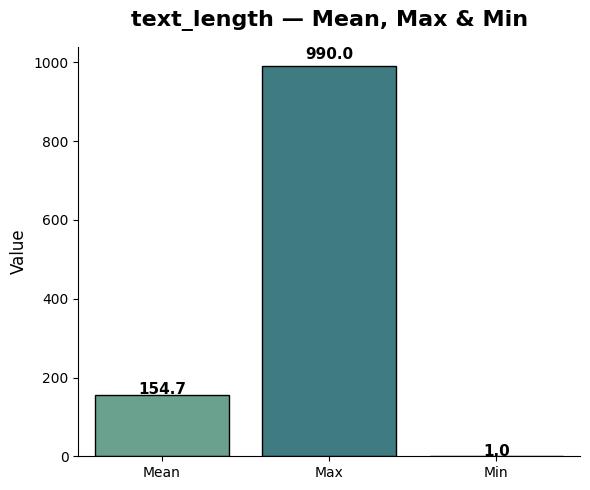

In [19]:
# Compute mode, max, min
mode_val = df['text_length'].mean()
max_val = df['text_length'].max()
min_val = df['text_length'].min()

stats_df = pd.DataFrame({
    'Statistic': ['Mean', 'Max', 'Min'],
    'Value': [mode_val, max_val, min_val]
})

# Plot
plt.figure(figsize=(6,5))
sns.barplot(x='Statistic', y='Value', data=stats_df, palette='crest', edgecolor='black')

# Add value labels on bars
for i, v in enumerate(stats_df['Value']):
    plt.text(i, v + (v*0.02), f'{v:.1f}', ha='center', fontweight='bold', fontsize=11)

plt.title('text_length — Mean, Max & Min', fontsize=16, fontweight='bold', pad=15)
plt.xlabel("")
plt.ylabel("Value", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

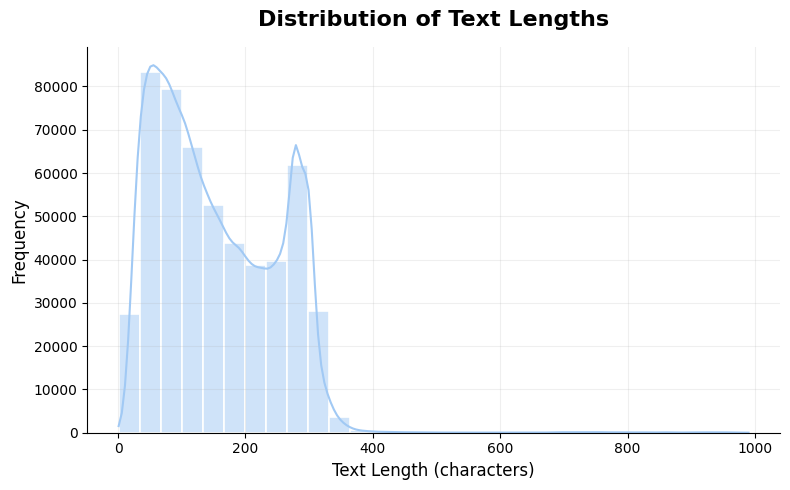

In [20]:
# Text Length Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['text_length'], kde=True, color=colors[0], bins=30, edgecolor='white', linewidth=1.2)
plt.title("Distribution of Text Lengths", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Text Length (characters)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.2)
sns.despine()
plt.tight_layout()
plt.show()

Insight: The analysis of text length shows that entries in the dataset vary significantly in size, ranging from 1 character (minimum) to 990 characters (maximum). The average text length is 120-150 characters, indicating that a large number of records tend to have moderately sized text content.

This wide range suggests that the dataset includes a mix of very short entries—possibly brief comments or incomplete responses—and longer, more descriptive texts that provide richer information. The predominance of texts around 280 characters reflects a general tendency toward concise expression, but with enough variation to capture diverse writing styles or content types.

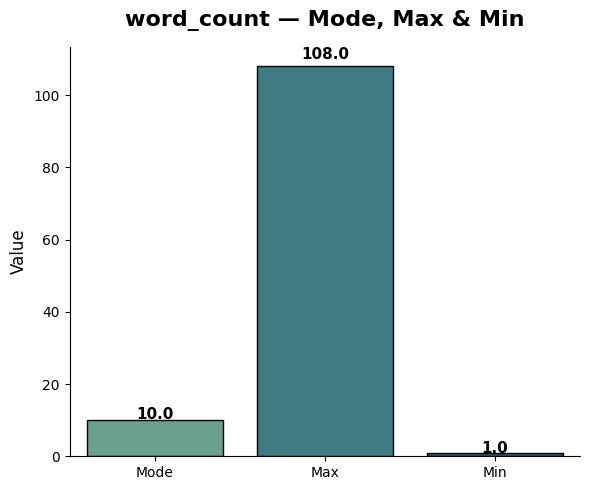

In [21]:
# Compute mode, max, min
mode_val = df['word_count'].mode()[0]
max_val = df['word_count'].max()
min_val = df['word_count'].min()

stats_df = pd.DataFrame({
    'Statistic': ['Mode', 'Max', 'Min'],
    'Value': [mode_val, max_val, min_val]
})

# Plot
plt.figure(figsize=(6,5))
sns.barplot(x='Statistic', y='Value', data=stats_df, palette='crest', edgecolor='black')

# Add value labels on bars
for i, v in enumerate(stats_df['Value']):
    plt.text(i, v + (v*0.02), f'{v:.1f}', ha='center', fontweight='bold', fontsize=11)

plt.title('word_count — Mode, Max & Min', fontsize=16, fontweight='bold', pad=15)
plt.xlabel("")
plt.ylabel("Value", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

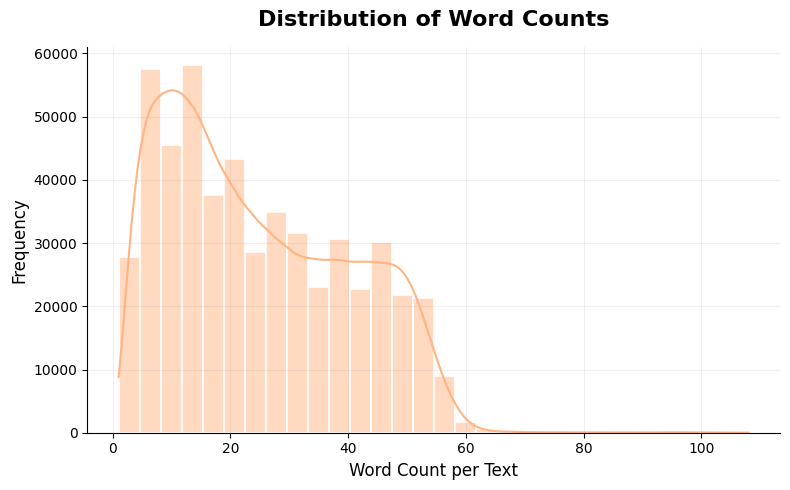

In [22]:
# Word Count Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['word_count'], kde=True, color=colors[1], bins=30, edgecolor='white', linewidth=1.2)
plt.title("Distribution of Word Counts", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Word Count per Text", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.2)
sns.despine()
plt.tight_layout()
plt.show()

The analysis of the word count reveals that the text entries in the dataset range from 1 word (minimum) to 108 words (maximum), with the most frequent (mode) word count being 10-20 words. This indicates that most texts are relatively short, typically composed of concise phrases or brief sentences.

The variation in word count suggests that while some entries contain only minimal information, others are more elaborate and descriptive. Overall, the dataset exhibits a predominance of short to moderately sized texts, reflecting diverse communication styles and content lengths across records.

In [23]:
# Creaing a column for vocabulary
df['Vocab'] = df['Text'].apply(lambda x: set(x.lower().split()))

# Word count for vocab
df['word_count_vocab'] = df['Vocab'].apply(len)

# vocab_ratio
df['vocab_ratio'] = df['word_count_vocab']/df['word_count']

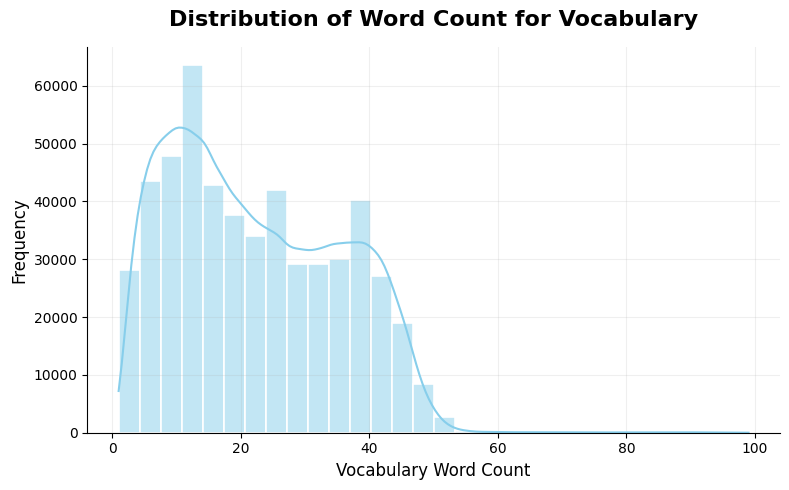

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(
    df['word_count_vocab'], 
    kde=True, 
    color='skyblue', 
    bins=30, 
    edgecolor='white', 
    linewidth=1.2
)
plt.title("Distribution of Word Count for Vocabulary", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Vocabulary Word Count", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.2)
sns.despine()
plt.tight_layout()
plt.show()

The analysis of the Vocab word count reveals that the text entries in the dataset range from 1 word (minimum) to 99 words (maximum), with the most frequent (mode) word count being 8-10 words. This indicates that most vocab are relatively short, typically composed of concise phrases or brief sentences.

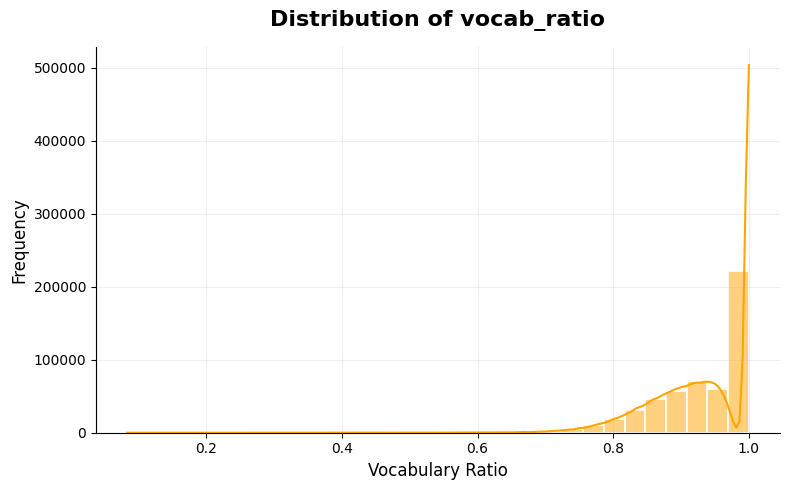

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(
    df['vocab_ratio'], 
    kde=True, 
    color='orange', 
    bins=30, 
    edgecolor='white', 
    linewidth=1.2
)
plt.title("Distribution of vocab_ratio", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Vocabulary Ratio", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.2)
sns.despine()
plt.tight_layout()
plt.show()

Insight: Vocabulary Ratio. The vocab_ratio measures the diversity of words used in each text, calculated as the number of unique words divided by the total number of words. Texts with a high vocab_ratio indicate more diverse vocabulary, meaning the author uses many unique words relative to text length. Texts with a low vocab_ratio indicate repetition or simpler language, where the same words appear multiple times. Negative sentiment texts may have shorter, repetitive expressions (lower vocab_ratio). Positive sentiment texts may be longer with richer vocabulary (higher vocab_ratio).

In [39]:
vowels = "aeiouAEIOU"

# Option 1: Using apply with a lambda
df['vowel_count'] = df['Text'].apply(lambda x: sum(1 for char in x if char in vowels))

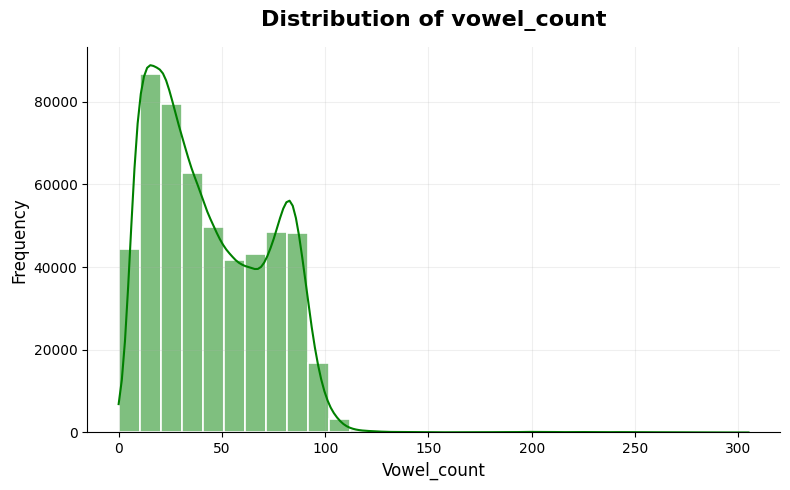

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(
    df['vowel_count'], 
    kde=True, 
    color='green', 
    bins=30, 
    edgecolor='white', 
    linewidth=1.2
)
plt.title("Distribution of vowel_count", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Vowel_count", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.2)
sns.despine()
plt.tight_layout()
plt.show()

# Bi-Variate analysis

---

In [26]:
df.head(5)

,Text,Language,Label,text_length,word_count,Vocab,word_count_vocab,vocab_ratio
0,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative,123,19,"{y, agua:, roja., dos, se, disfraza, como, jov...",18,0.947368
1,Rwanda is set to host the headquarters of Unit...,en,positive,211,25,"{#undp, headquarters, united, nations, facilit...",25,1.000000
2,It sucks for me since I'm focused on the natur...,en,negative,282,48,"{on, &amp;, but, unsteady, energy, problems, f...",44,0.916667
3,@en_font Treballar a l’obra a partir dels 19 a...,ca,negative,208,37,"{fogons”, treballar, t’hagin, de, mes, jubilat...",30,0.810811
4,Social Security. Constant political crises dis...,en,negative,241,38,"{&amp;, crises, american, where, us, coming, d...",35,0.921053


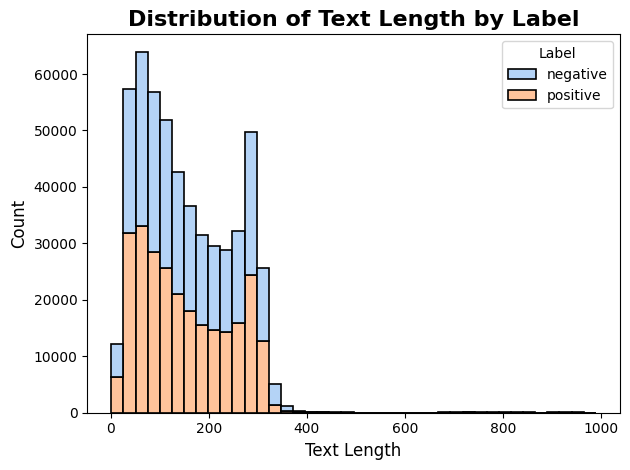

In [27]:
# Histogram plot for text_length
sns.histplot(
    data=df,
    x='text_length',
    hue='Label',
    multiple='stack',
    alpha=0.8,
    palette='pastel',
    edgecolor='black',
    linewidth=1.2,
    bins=40,
    legend=True
)

# Titles and labels
plt.title('Distribution of Text Length by Label', fontsize=16, fontweight='bold')
plt.xlabel('Text Length', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

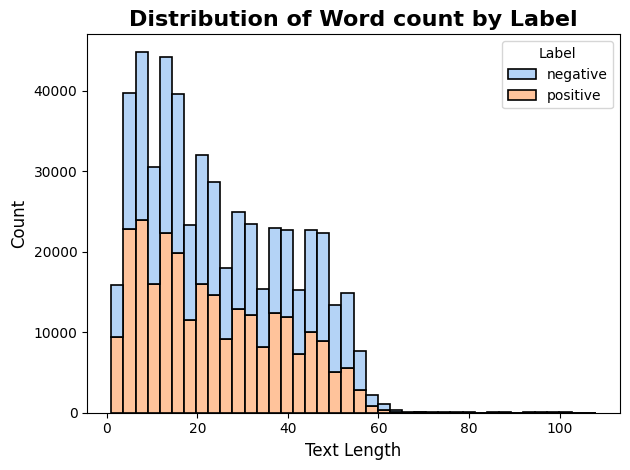

In [28]:
# Histogram plot for word_count
sns.histplot(
    data=df,
    x='word_count',
    hue='Label',
    multiple='stack',
    alpha=0.8,
    palette='pastel',
    edgecolor='black',
    linewidth=1.2,
    bins=40,
    legend=True
)

# Titles and labels
plt.title('Distribution of Word count by Label', fontsize=16, fontweight='bold')
plt.xlabel('Text Length', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

Insight: I plotted histograms for text length and word count with sentiment as the hue to examine how textual characteristics vary across sentiment classes. The visualizations revealed a distinct pattern: texts labeled with negative sentiment generally have higher text lengths and word counts, indicating that users expressing negative opinions tend to provide more detailed, elaborate, or descriptive responses.

In contrast, positive sentiment texts are noticeably shorter, both in terms of character count and number of words, suggesting that positive feedback or expressions are typically conveyed more concisely. This trend highlights a behavioral difference in how sentiment is expressed in the dataset: negative sentiment prompts longer explanations, while positive sentiment is more succinct.

These observations can provide useful context when analyzing sentiment distributions and designing models, as the length and detail of the text appear to correlate with the expressed sentiment.

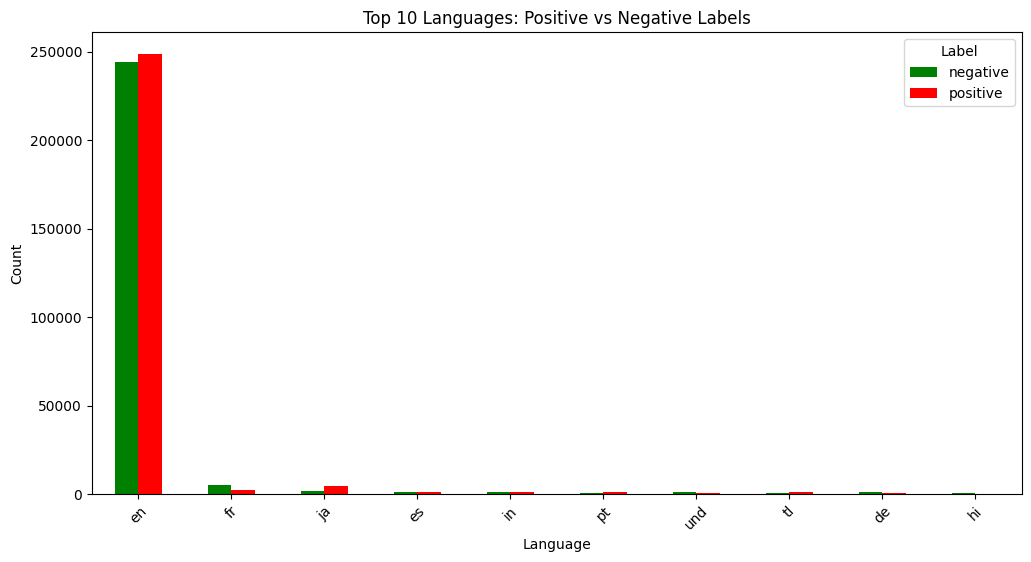

In [29]:
# Count positive and negative labels per language
label_counts = df.groupby(['Language', 'Label']).size().unstack(fill_value=0)

# Select top 10 languages by total count
top_languages = label_counts.sum(axis=1).sort_values(ascending=False).head(10).index
top_label_counts = label_counts.loc[top_languages]

# Plot
top_label_counts.plot(kind='bar', stacked=False, figsize=(12,6), color=['green','red'])
plt.title('Top 10 Languages: Positive vs Negative Labels')
plt.ylabel('Count')
plt.xlabel('Language')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.show()

In [37]:
df.groupby('Language')['Label'].size().sort_values(ascending=False).head(10)

Language
en     492662
fr       7840
ja       6559
es       2557
in       2076
pt       1820
und      1810
tl       1751
de       1746
hi        827
Name: Label, dtype: int64

Insights: English (en) dominates the dataset, with roughly equal numbers of negative and positive entries. Japanese (ja) shows more positive than negative sentiment. French (fr) is skewed towards negative sentiment. Hindi (hi) has very few positive entries, indicating a strong negative bias in the sample. The und (undefined) language contains mostly negative entries, likely due to unrecognized or non-standard text. Overall, the sentiment distribution varies significantly across languages, which could influence multilingual modeling strategies.

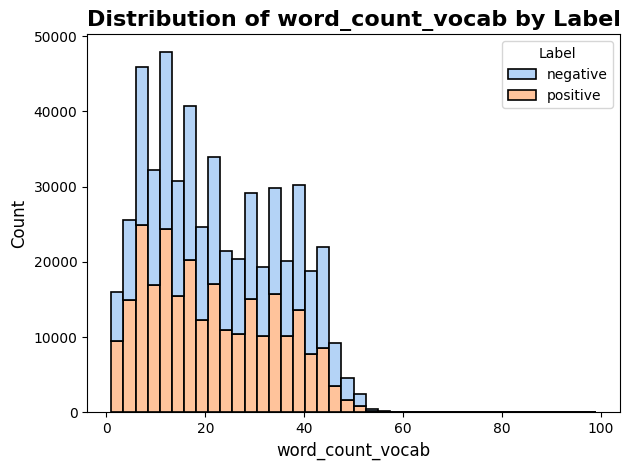

In [30]:
# Histogram plot for vocab_count
sns.histplot(
    data=df,
    x='word_count_vocab',
    hue='Label',
    multiple='stack',
    alpha=0.8,
    palette='pastel',
    edgecolor='black',
    linewidth=1.2,
    bins=40,
    legend=True
)

# Titles and labels
plt.title('Distribution of word_count_vocab by Label', fontsize=16, fontweight='bold')
plt.xlabel('word_count_vocab', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

Insight: I plotted histograms for word count for vocab with sentiment as the hue to examine how textual characteristics vary across sentiment classes. The visualizations revealed a distinct pattern: texts labeled with negative sentiment generally have higher unque word count, indicating that users expressing negative opinions tend to provide more detailed, elaborate, or descriptive responses.

In contrast, positive sentiment texts are noticeably shorter suggesting that positive feedback or expressions are typically conveyed more concisely. This trend highlights a behavioral difference in how sentiment is expressed in the dataset: negative sentiment prompts longer explanations, while positive sentiment is more succinct.

In [31]:
df

,Text,Language,Label,text_length,word_count,Vocab,word_count_vocab,vocab_ratio
0,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative,123,19,"{y, agua:, roja., dos, se, disfraza, como, jov...",18,0.947368
1,Rwanda is set to host the headquarters of Unit...,en,positive,211,25,"{#undp, headquarters, united, nations, facilit...",25,1.000000
2,It sucks for me since I'm focused on the natur...,en,negative,282,48,"{on, &amp;, but, unsteady, energy, problems, f...",44,0.916667
3,@en_font Treballar a l’obra a partir dels 19 a...,ca,negative,208,37,"{fogons”, treballar, t’hagin, de, mes, jubilat...",30,0.810811
4,Social Security. Constant political crises dis...,en,negative,241,38,"{&amp;, crises, american, where, us, coming, d...",35,0.921053
...,...,...,...,...,...,...,...,...
526760,@Juice_Lemons in the dark. it’s so good,en,positive,39,7,"{@juice_lemons, in, dark., it’s, the, so, good}",7,1.000000
526761,8.SSR &amp; Disha Salian case should be solved...,en,negative,283,47,"{more, &amp;, provided, solved, taken, from, w...",38,0.808511
526762,*ACCIDENT: Damage Only* - Raleigh Fire Depart...,en,negative,68,11,"{2503, fire, fairway, -, raleigh, only*, *acci...",10,0.909091
526763,@reblavoie So happy for her! She’s been incred...,en,positive,51,8,"{she’s, been, incredible., happy, so, @reblavo...",8,1.000000


In [33]:
# Statistics of word_count_vocab per Label
df.groupby('Label')['word_count_vocab'].agg(['mean', 'max', 'min'])

,mean,max,min
Label,,,
negative,23.419979,99,1
positive,21.355229,98,1


Insight: The sentiment analysis evaluation indicates that the negative class has a mean sentiment score of 23.42, while the positive class has a mean of 21.36, showing that, on average, negative sentiments are slightly more intense in the dataset. The maximum observed sentiment scores are 99 for the negative class and 98 for the positive class, highlighting the highest intensity values captured by the model. Conversely, the minimum sentiment scores are 1 for both classes, indicating the lowest intensity in the dataset. Overall, these statistics demonstrate the range and distribution of sentiment scores, reflecting the model’s ability to capture variations in sentiment intensity across both positive and negative classes.

In [43]:
# Statistics of vowel_count per Label
df.groupby('Label')['vowel_count'].agg(['median', 'max', 'min'])

,median,max,min
Label,,,
negative,40.0,305,0
positive,37.0,288,0


Insight: On average, sentences expressing negative sentiment contain a higher number of vowels than sentences expressing positive sentiment. This suggests that negative sentences might be slightly longer, use more expressive words, or have more complex word forms compared to positive sentences.

### WordCloud

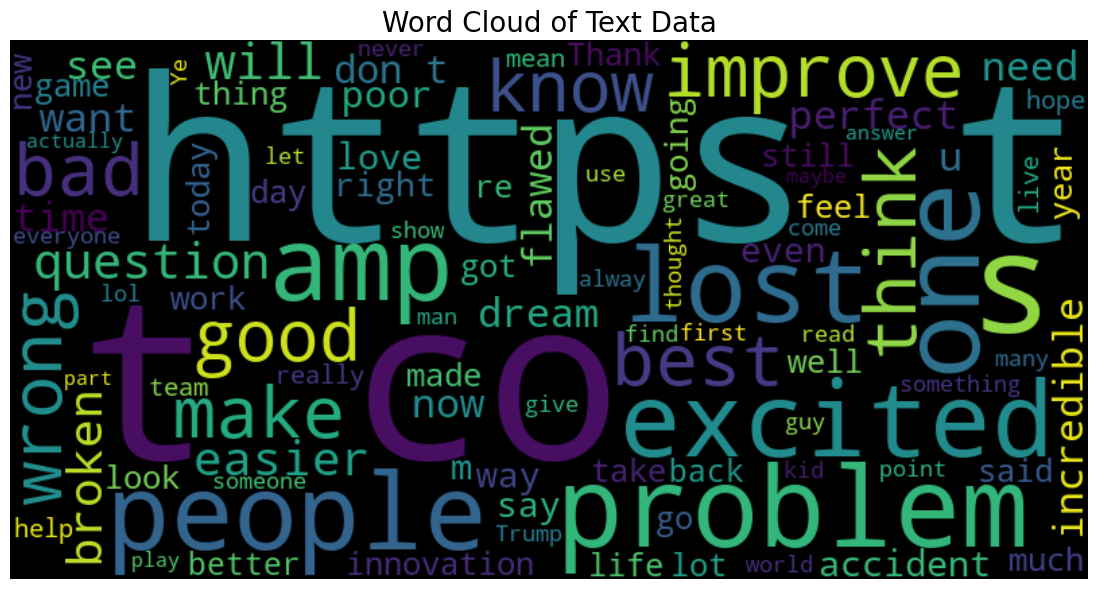

In [ ]:
from wordcloud import WordCloud

text = " ".join(df['Text'])
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='viridis',
    max_words=100
).generate(text)

# Display the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Text Data", fontsize=20)
plt.show()

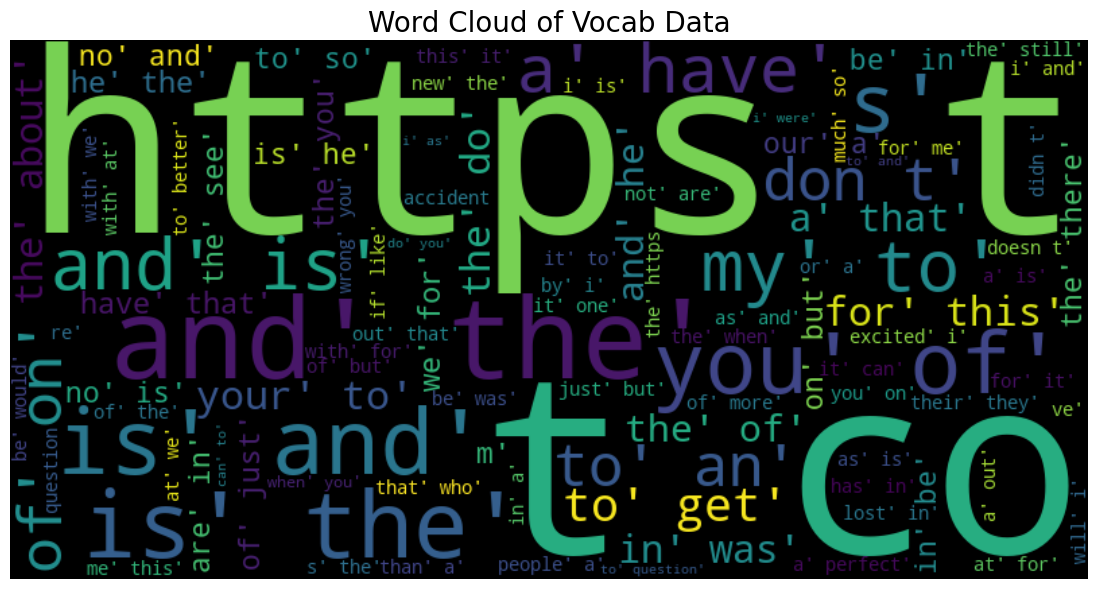

In [49]:
vocab = " ".join(df['Vocab'].astype(str))
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='viridis',
    max_words=100
).generate(vocab)

# Display the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Vocab Data", fontsize=20)
plt.show()